# نائجیریا کے موسیقی کا اسپاٹیفائی سے تجزیہ


In [104]:
pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


آخری سبق میں جہاں ہم نے ختم کیا تھا، وہیں سے شروع کریں، ڈیٹا درآمد اور فلٹر کیا گیا ہو۔


In [105]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("../../data/nigerian-songs.csv")
df.head()

name                         album  \
0                    Sparky            Mandy & The Jungle   
1                shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                     LITT!                         LITT!   
3  Confident / Feeling Cool               Enjoy Your Life   
4                wanted you                         rare.   

                artist artist_top_genre  release_date  length  popularity  \
0        Cruel Santino  alternative r&b          2019  144000          48   
1  Odunsi (The Engine)          afropop          2020   89488          30   
2                 AYLØ        indie r&b          2018  207758          40   
3           Lady Donli     nigerian pop          2019  175135          14   
4  Odunsi (The Engine)          afropop          2018  152049          25   

   danceability  acousticness  energy  instrumentalness  liveness  loudness  \
0         0.666        0.8510   0.420          0.534000    0.1100    -6.699   
1         0.710        0.0822   0.683          0.000169    0.1010    -5.640   
2         0.836        0.2720   0.564          0.000537    0.1100    -7.127   
3         0.894        0.7980   0.611          0.000187    0.0964    -4.961   
4         0.702        0.1160   0.833          0.910000    0.3480    -6.044   

   speechiness    tempo  time_signature  
0       0.0829  133.015               5  
1       0.3600  129.993               3  
2       0.0424  130.005               4  
3       0.1130  111.087               4  
4       0.0447  105.115               4

ہم صرف 3 اصناف پر توجہ مرکوز کریں گے۔ شاید ہم 3 کلسٹرز بنا سکیں!


Text(0.5, 1.0, 'Top genres')

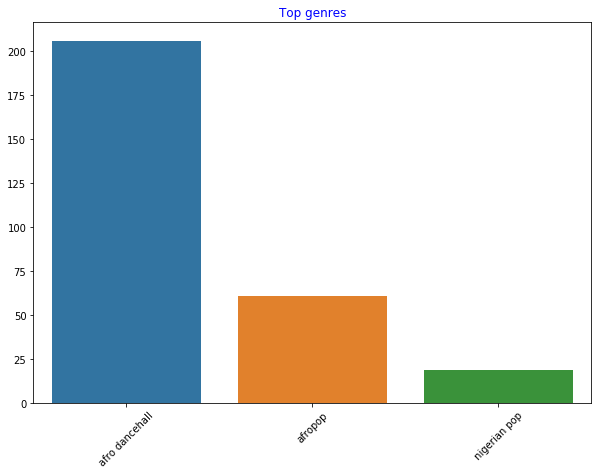

In [106]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [107]:
df.head()

name                         album  \
1                shuga rush  EVERYTHING YOU HEARD IS TRUE   
3  Confident / Feeling Cool               Enjoy Your Life   
4                wanted you                         rare.   
5                    Kasala                      Pioneers   
6                   Pull Up             Everything Pretty   

                artist artist_top_genre  release_date  length  popularity  \
1  Odunsi (The Engine)          afropop          2020   89488          30   
3           Lady Donli     nigerian pop          2019  175135          14   
4  Odunsi (The Engine)          afropop          2018  152049          25   
5          DRB Lasgidi     nigerian pop          2020  184800          26   
6          prettyboydo     nigerian pop          2018  202648          29   

   danceability  acousticness  energy  instrumentalness  liveness  loudness  \
1         0.710        0.0822   0.683          0.000169    0.1010    -5.640   
3         0.894        0.7980   0.611          0.000187    0.0964    -4.961   
4         0.702        0.1160   0.833          0.910000    0.3480    -6.044   
5         0.803        0.1270   0.525          0.000007    0.1290   -10.034   
6         0.818        0.4520   0.587          0.004490    0.5900    -9.840   

   speechiness    tempo  time_signature  
1       0.3600  129.993               3  
3       0.1130  111.087               4  
4       0.0447  105.115               4  
5       0.1970  100.103               4  
6       0.1990   95.842               4

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# X = df.loc[:, ('danceability','energy')]







In [110]:
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn import datasets

X = df[['danceability','acousticness']].values
y = df['energy'].values

# X = scaler.fit_transform(X)

# step size in the mesh
h = .02

rng = np.random.RandomState(0)
y_rand = rng.rand(y.shape[0])
y_30 = np.copy(y)
y_30[y_rand < 0.3] = -1  # set random samples to be unlabeled
y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (LabelSpreading().fit(X, y_30), y_30, 'Label Spreading 30% data')
ls50 = (LabelSpreading().fit(X, y_50), y_50, 'Label Spreading 50% data')
ls100 = (LabelSpreading().fit(X, y), y, 'Label Spreading 100% data')

# the base classifier for self-training is identical to the SVC
base_classifier = SVC(kernel='rbf', gamma=.5, probability=True)
st30 = (SelfTrainingClassifier(base_classifier).fit(X, y_30),
        y_30, 'Self-training 30% data')
st50 = (SelfTrainingClassifier(base_classifier).fit(X, y_50),
        y_50, 'Self-training 50% data')

rbf_svc = (SVC(kernel='rbf', gamma=.5).fit(X, y), y, 'SVC with rbf kernel')

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

classifiers = (ls30, st30, ls50, st50, ls100, rbf_svc)
for i, (clf, y_train, title) in enumerate(classifiers):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

ValueError: Unknown label type: 'continuous'


---

**ڈسکلیمر**:  
یہ دستاویز AI ترجمہ سروس [Co-op Translator](https://github.com/Azure/co-op-translator) کا استعمال کرتے ہوئے ترجمہ کی گئی ہے۔ ہم درستگی کے لیے کوشش کرتے ہیں، لیکن براہ کرم آگاہ رہیں کہ خودکار ترجمے میں غلطیاں یا غیر درستیاں ہو سکتی ہیں۔ اصل دستاویز کو اس کی اصل زبان میں مستند ذریعہ سمجھا جانا چاہیے۔ اہم معلومات کے لیے، پیشہ ور انسانی ترجمہ کی سفارش کی جاتی ہے۔ ہم اس ترجمے کے استعمال سے پیدا ہونے والی کسی بھی غلط فہمی یا غلط تشریح کے ذمہ دار نہیں ہیں۔
